In [1]:
import netCDF4 as nc
from salishsea_tools import tidetools, nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from mpl_toolkits.basemap import Basemap

%matplotlib inline
resultsDir='/data/eolson/MEOPAR/SS2D/'

In [2]:
grid=nc.Dataset(os.path.join(resultsDir,'coordinates.nc.Nancy.summer'))

In [3]:
print grid.dimensions['time']

<type 'netCDF4.Dimension'> (unlimited): name = 'time', size = 1



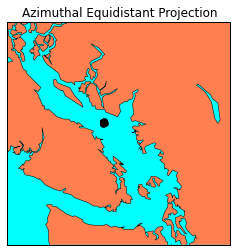

In [4]:
width = 280000; lon_0 = -123.5; lat_0 = 49.2
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0,resolution='i')
# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='coral',lake_color='aqua')
# 20 degree graticule.
#m.drawparallels(np.arange(-80,81,20))
#m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(grid.variables['nav_lon'][500:505,250:255], grid.variables['nav_lat'][500:505,250:255])
m.plot(xpt,ypt,'ko')
# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()

In [5]:
new_coords=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/coords5x5.nc','w')
new_coords.createDimension('y', 5)
new_coords.createDimension('x', 5)
new_coords.createDimension('time', None)

nc_tools.show_dimensions(grid)
nc_tools.show_dimensions(new_coords)

<type 'netCDF4.Dimension'>: name = 'x', size = 398

<type 'netCDF4.Dimension'>: name = 'y', size = 898

<type 'netCDF4.Dimension'> (unlimited): name = 'time', size = 1

<type 'netCDF4.Dimension'>: name = 'y', size = 5

<type 'netCDF4.Dimension'>: name = 'x', size = 5

<type 'netCDF4.Dimension'> (unlimited): name = 'time', size = 0



In [6]:
var=grid.variables.keys()
print grid.variables[var[0]]

<type 'netCDF4.Variable'>
float32 nav_lon(y, x)
    units: degrees_east
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off



In [7]:
new_x=new_coords.createVariable('nav_lon',float,('y','x'), zlib=True)
new_x.setncattr('units',grid.variables['nav_lon'].units)
new_x.setncattr('comment',grid.variables['nav_lon'].comment)
new_x[:]=grid.variables['nav_lon'][500:505,250:255]


In [8]:
print grid.variables[var[1]]

<type 'netCDF4.Variable'>
float32 nav_lat(y, x)
    units: degrees_north
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off



In [9]:
new_y = new_coords.createVariable('nav_lat',float,('y','x'), zlib=True)
new_y.setncattr('units',grid.variables['nav_lat'].units)
new_y.setncattr('comment',grid.variables['nav_lat'].comment)
new_y[:]=grid.variables['nav_lat'][500:505,250:255]

In [10]:
print grid.variables[var[2]]

<type 'netCDF4.Variable'>
float32 time(time)
    units: seconds since 0001-01-01 00:00:00
    time_origin: 0000-JAN-01 00:00:00
    calendar: gregorian
unlimited dimensions: time
current shape = (1,)
filling off



In [11]:
new_t = new_coords.createVariable('time',float,'time',zlib=True)
new_t.setncattr('units',grid.variables['time'].units)
new_t.setncattr('time_origin',grid.variables['time'].time_origin)
new_t.setncattr('calendar',grid.variables['time'].calendar)
new_t[:]=grid.variables['time']

In [12]:
print grid.variables[var[3]]

<type 'netCDF4.Variable'>
int32 time_steps(time)
    units: seconds since 0001-01-01 00:00:00
    time_origin: 0000-JAN-01 00:00:00
unlimited dimensions: time
current shape = (1,)
filling off



In [13]:
new_ts = new_coords.createVariable('time_steps',float,'time',zlib=True)
new_ts.setncattr('units',grid.variables['time_steps'].units)
new_ts.setncattr('time_origin',grid.variables['time_steps'].time_origin)
new_ts[:]=grid.variables['time_steps']

In [14]:
print grid.variables[var[4]]

<type 'netCDF4.Variable'>
float64 glamt(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [15]:
new_gt = new_coords.createVariable('glamt',float,('time','y','x'),zlib=True)
new_gt.setncattr('missing_value',grid.variables['glamt'].missing_value)
new_gt[:,:,:]=grid.variables['glamt'][:,500:505,250:255]

In [16]:
print grid.variables[var[5]]

<type 'netCDF4.Variable'>
float64 glamu(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [17]:
new_gu = new_coords.createVariable('glamu',float,('time','y','x'),zlib=True)
new_gu.setncattr('missing_value',grid.variables['glamu'].missing_value)
new_gu[:,:,:]=grid.variables['glamu'][:,500:505,250:255]

In [18]:
print grid.variables[var[6]]

<type 'netCDF4.Variable'>
float64 glamv(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [19]:
new_gv = new_coords.createVariable('glamv',float,('time','y','x'),zlib=True)
new_gv.setncattr('missing_value',grid.variables['glamv'].missing_value)
new_gv[:,:,:]=grid.variables['glamv'][:,500:505,250:255]

In [20]:
print grid.variables[var[7]]

<type 'netCDF4.Variable'>
float64 glamf(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [21]:
new_gf = new_coords.createVariable('glamf',float,('time','y','x'),zlib=True)
new_gf.setncattr('missing_value',grid.variables['glamf'].missing_value)
new_gf[:,:,:]=grid.variables['glamf'][:,500:505,250:255]

In [22]:
print grid.variables[var[8]]

<type 'netCDF4.Variable'>
float64 gphit(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [23]:
new_pt = new_coords.createVariable('gphit',float,('time','y','x'),zlib=True)
new_pt.setncattr('missing_value',grid.variables['gphit'].missing_value)
new_pt[:,:,:]=grid.variables['gphit'][:,500:505,250:255]

In [24]:
print grid.variables[var[9]]

<type 'netCDF4.Variable'>
float64 gphiu(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [25]:
new_pu = new_coords.createVariable('gphiu',float,('time','y','x'),zlib=True)
new_pu.setncattr('missing_value',grid.variables['gphiu'].missing_value)
new_pu[:,:,:]=grid.variables['gphiu'][:,500:505,250:255]

In [26]:
print grid.variables[var[10]]

<type 'netCDF4.Variable'>
float64 gphiv(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [27]:
new_pv = new_coords.createVariable('gphiv',float,('time','y','x'),zlib=True)
new_pv.setncattr('missing_value',grid.variables['gphiv'].missing_value)
new_pv[:,:,:]=grid.variables['gphiv'][:,500:505,250:255]

In [28]:
print grid.variables[var[11]]

<type 'netCDF4.Variable'>
float64 gphif(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [29]:
new_pf = new_coords.createVariable('gphif',float,('time','y','x'),zlib=True)
new_pf.setncattr('missing_value',grid.variables['gphif'].missing_value)
new_pf[:,:,:]=grid.variables['gphif'][:,500:505,250:255]

In [30]:
print grid.variables[var[12]]

<type 'netCDF4.Variable'>
float64 e1t(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [31]:
new_et = new_coords.createVariable('e1t',float,('time','y','x'),zlib=True)
new_et.setncattr('missing_value',grid.variables['e1t'].missing_value)
new_et[:,:,:]=grid.variables['e1t'][:,500:505,250:255]

In [32]:
print grid.variables[var[13]]

<type 'netCDF4.Variable'>
float64 e1u(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [33]:
new_eu = new_coords.createVariable('e1u',float,('time','y','x'),zlib=True)
new_eu.setncattr('missing_value',grid.variables['e1u'].missing_value)
new_eu[:,:,:]=grid.variables['e1u'][:,500:505,250:255]

In [34]:
print grid.variables[var[14]]

<type 'netCDF4.Variable'>
float64 e1v(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [35]:
new_ev = new_coords.createVariable('e1v',float,('time','y','x'),zlib=True)
new_ev.setncattr('missing_value',grid.variables['e1v'].missing_value)
new_ev[:,:,:]=grid.variables['e1v'][:,500:505,250:255]

In [36]:
print grid.variables[var[15]]

<type 'netCDF4.Variable'>
float64 e1f(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [37]:
new_ef = new_coords.createVariable('e1f',float,('time','y','x'),zlib=True)
new_ef.setncattr('missing_value',grid.variables['e1f'].missing_value)
new_ef[:,:,:]=grid.variables['e1f'][:,500:505,250:255]

In [38]:
print grid.variables[var[16]]

<type 'netCDF4.Variable'>
float64 e2t(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [39]:
new_e2t = new_coords.createVariable('e2t',float,('time','y','x'),zlib=True)
new_e2t.setncattr('missing_value',grid.variables['e2t'].missing_value)
new_e2t[:,:,:]=grid.variables['e2t'][:,500:505,250:255]

In [40]:
print grid.variables[var[17]]

<type 'netCDF4.Variable'>
float64 e2u(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [41]:
new_e2u = new_coords.createVariable('e2u',float,('time','y','x'),zlib=True)
new_e2u.setncattr('missing_value',grid.variables['e2u'].missing_value)
new_e2u[:,:,:]=grid.variables['e2u'][:,500:505,250:255]

In [42]:
print grid.variables[var[18]]

<type 'netCDF4.Variable'>
float64 e2v(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [43]:
new_e2v = new_coords.createVariable('e2v',float,('time','y','x'),zlib=True)
new_e2v.setncattr('missing_value',grid.variables['e2v'].missing_value)
new_e2v[:,:,:]=grid.variables['e2v'][:,500:505,250:255]

In [44]:
print grid.variables[var[19]]

<type 'netCDF4.Variable'>
float64 e2f(time, y, x)
    missing_value: 1e+20
unlimited dimensions: time
current shape = (1, 898, 398)
filling off



In [45]:
new_e2f = new_coords.createVariable('e2f',float,('time','y','x'),zlib=True)
new_e2f.setncattr('missing_value',grid.variables['e2f'].missing_value)
new_e2f[:,:,:]=grid.variables['e2f'][:,500:505,250:255]

In [46]:
new_coords.title="""SS2D 5x5 Coordinates"""
new_coords.institution="""
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""
new_coords.comment= """
Based on coordinates.nc.Nancy.summer"""
new_coords.reference= """
eolson: alteCoords_5x5.ipynb"""

In [47]:
nc_tools.show_dataset_attrs(new_coords)

file format: NETCDF4
title: SS2D 5x5 Coordinates
institution: 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
comment: 
Based on coordinates.nc.Nancy.summer
reference: 
eolson: alteCoords_5x5.ipynb


In [48]:
new_coords.close()

In [50]:
B=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/coords5x5.nc')
print B.variables
print grid.variables

OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7f7f8b4f58a0>), (u'nav_lat', <netCDF4.Variable object at 0x7f7f8b4f5770>), (u'time', <netCDF4.Variable object at 0x7f7f8b4f5a68>), (u'time_steps', <netCDF4.Variable object at 0x7f7f8b4f5b00>), (u'glamt', <netCDF4.Variable object at 0x7f7f8b4f5b98>), (u'glamu', <netCDF4.Variable object at 0x7f7f8b4f5c30>), (u'glamv', <netCDF4.Variable object at 0x7f7f8b4f5cc8>), (u'glamf', <netCDF4.Variable object at 0x7f7f8b4f5d60>), (u'gphit', <netCDF4.Variable object at 0x7f7f8b4f5df8>), (u'gphiu', <netCDF4.Variable object at 0x7f7f8b4f5e90>), (u'gphiv', <netCDF4.Variable object at 0x7f7f8b4f5f28>), (u'gphif', <netCDF4.Variable object at 0x7f7f8b14d050>), (u'e1t', <netCDF4.Variable object at 0x7f7f8b14d0e8>), (u'e1u', <netCDF4.Variable object at 0x7f7f8b14d180>), (u'e1v', <netCDF4.Variable object at 0x7f7f8b14d218>), (u'e1f', <netCDF4.Variable object at 0x7f7f8b14d2b0>), (u'e2t', <netCDF4.Variable object at 0x7f7f8b14d348>), (u'e2u', <netCDF4.Va

In [51]:
grid.close()
B.close()